# DRUG

## Context
Since as a beginner in machine learning it would be a great opportunity to try some techniques to predict the outcome of the drugs that might be accurate for the patient.

## Content
The target feature is
Drug type
The feature sets are:
Age
Sex
Blood Pressure Levels (BP)
Cholesterol Levels
Na to Potassium Ration

## Inspiration
The main problem here in not just the feature sets and target sets but also the approach that is taken in solving these types of problems as a beginner. So best of luck.

## Import Library

In [195]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [157]:
df_drug = pd.read_csv("./Data/drug200.csv")

In [158]:
df_drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [159]:
df_drug['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [160]:
df_drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [161]:
df_drug.describe(include=['O'])

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,DrugY
freq,104,77,103,91


In [162]:
df_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


# EDA

In [163]:
df_drug.columns.values

array(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype=object)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

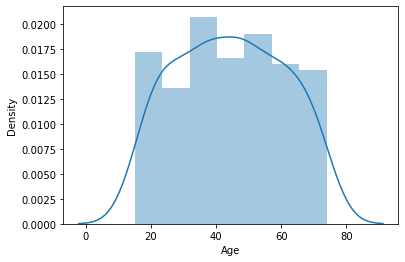

In [164]:
sns.distplot(df_drug['Age'])

In [165]:
print("min Age: ",df_drug['Age'].min())
print("max Age: ",df_drug['Age'].max())

min Age:  15
max Age:  74


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Na_to_K', ylabel='Density'>

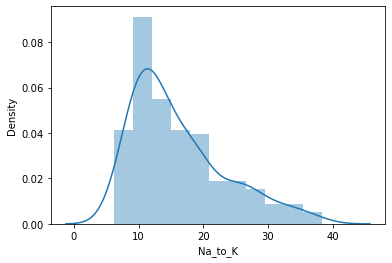

In [166]:
sns.distplot(df_drug['Na_to_K'])

In [167]:
print("min rasio: ",df_drug['Na_to_K'].min())
print("max rasio: ",df_drug['Na_to_K'].max())
print("Mode: ",df_drug['Na_to_K'].mode())

min rasio:  6.269
max rasio:  38.247
Mode:  0    12.006
1    18.295
dtype: float64


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Drug', ylabel='count'>

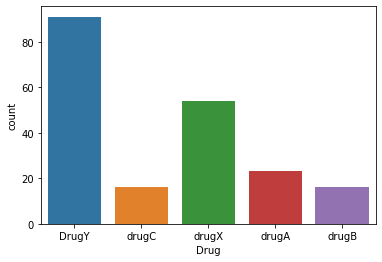

In [168]:
sns.countplot(df_drug['Drug'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

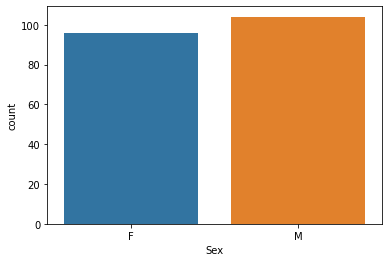

In [169]:
sns.countplot(df_drug['Sex'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BP', ylabel='count'>

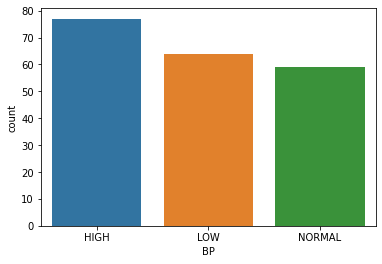

In [170]:
sns.countplot(df_drug['BP'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

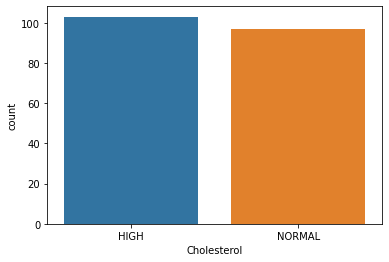

In [171]:
sns.countplot(df_drug['Cholesterol'])

Analisis Bivariate (fitur vs target fitur)

<AxesSubplot:xlabel='Drug', ylabel='Age'>

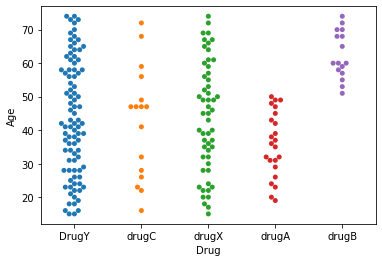

In [172]:
sns.swarmplot(data = df_drug, x = "Drug", y = "Age" )

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

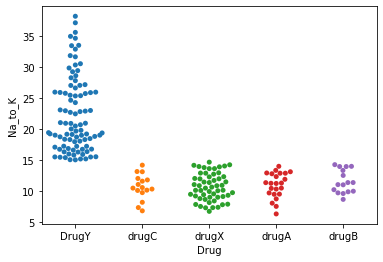

In [173]:
sns.swarmplot(data = df_drug, x = "Drug", y = "Na_to_K" )

<AxesSubplot:xlabel='Drug', ylabel='count'>

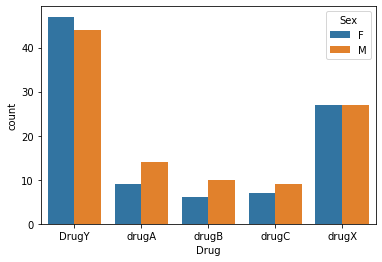

In [174]:
df_drug_sex = df_drug.groupby(["Drug","Sex"]).size().reset_index(name = "count")
sns.barplot(data = df_drug_sex, x='Drug', y='count', hue='Sex')

<AxesSubplot:xlabel='Drug', ylabel='count'>

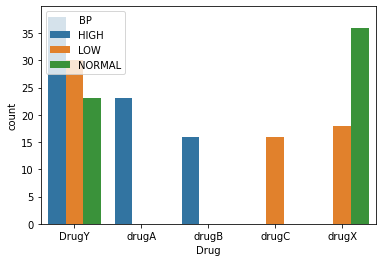

In [175]:
df_drug_bp = df_drug.groupby(["Drug","BP"]).size().reset_index(name = "count")
sns.barplot(data = df_drug_bp, x='Drug', y='count', hue='BP')

<AxesSubplot:xlabel='Drug', ylabel='count'>

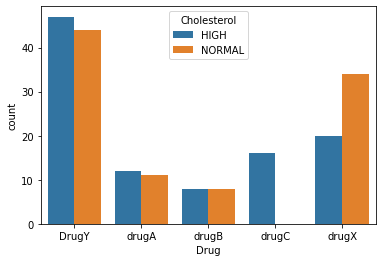

In [176]:
df_drug_chol = df_drug.groupby(["Drug","Cholesterol"]).size().reset_index(name = "count")
sns.barplot(data = df_drug_chol, x='Drug', y='count', hue='Cholesterol')

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

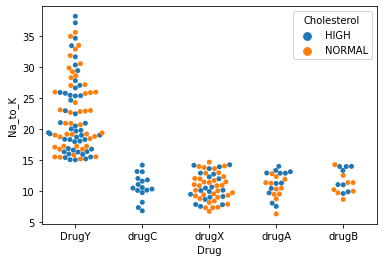

In [178]:
sns.swarmplot(x = "Drug", y = "Na_to_K",hue="Cholesterol",data = df_drug)

<AxesSubplot:xlabel='Drug', ylabel='Age'>

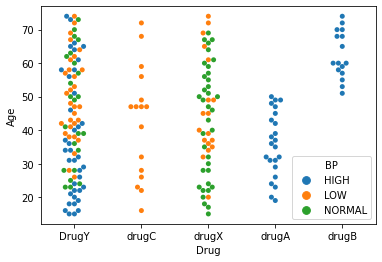

In [179]:
sns.swarmplot(x = "Drug", y = "Age",hue="BP",data = df_drug)

<AxesSubplot:xlabel='BP', ylabel='Na_to_K'>

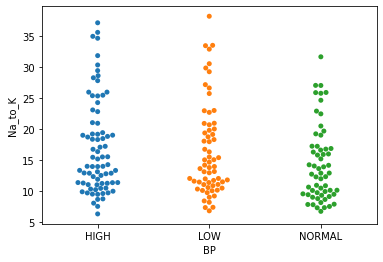

In [180]:
sns.swarmplot(data = df_drug, x = "BP", y = "Na_to_K" )

## Feature Engineering

In [181]:
df_drug['Na_to_K_>_15'] = df_drug['Na_to_K'].apply(lambda x : 1 if x > 15 else 0)
df_drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_>_15
0,23,F,HIGH,HIGH,25.355,DrugY,1
1,47,M,LOW,HIGH,13.093,drugC,0
2,47,M,LOW,HIGH,10.114,drugC,0
3,28,F,NORMAL,HIGH,7.798,drugX,0
4,61,F,LOW,HIGH,18.043,DrugY,1
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,0
196,16,M,LOW,HIGH,12.006,drugC,0
197,52,M,NORMAL,HIGH,9.894,drugX,0
198,23,M,NORMAL,NORMAL,14.020,drugX,0


<AxesSubplot:xlabel='Drug', ylabel='count'>

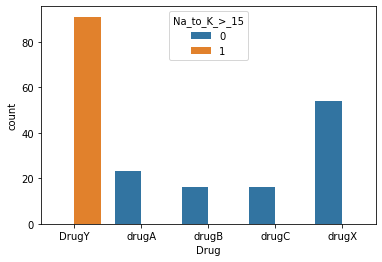

In [182]:
df_drug_NaK15 = df_drug.groupby(["Drug","Na_to_K_>_15"]).size().reset_index(name = "count")
sns.barplot(data = df_drug_NaK15, x='Drug', y='count', hue='Na_to_K_>_15')

In [183]:
df_drug['AgeBand'] = pd.cut(df_drug['Age'], 5)
df_drug['NaKBand'] = pd.cut(df_drug['Na_to_K'], 4)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AgeBand', ylabel='count'>

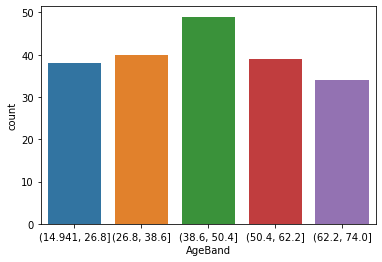

In [184]:
sns.countplot(df_drug['AgeBand'])

<AxesSubplot:xlabel='NaKBand', ylabel='count'>

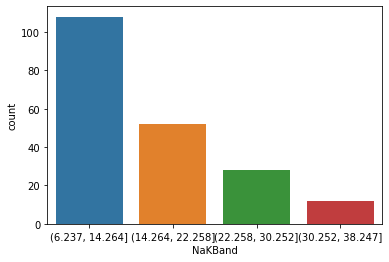

In [185]:
sns.countplot(df_drug['NaKBand'])

In [186]:
df_drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_>_15,AgeBand,NaKBand
0,23,F,HIGH,HIGH,25.355,DrugY,1,"(14.941, 26.8]","(22.258, 30.252]"
1,47,M,LOW,HIGH,13.093,drugC,0,"(38.6, 50.4]","(6.237, 14.264]"
2,47,M,LOW,HIGH,10.114,drugC,0,"(38.6, 50.4]","(6.237, 14.264]"
3,28,F,NORMAL,HIGH,7.798,drugX,0,"(26.8, 38.6]","(6.237, 14.264]"
4,61,F,LOW,HIGH,18.043,DrugY,1,"(50.4, 62.2]","(14.264, 22.258]"
...,...,...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,0,"(50.4, 62.2]","(6.237, 14.264]"
196,16,M,LOW,HIGH,12.006,drugC,0,"(14.941, 26.8]","(6.237, 14.264]"
197,52,M,NORMAL,HIGH,9.894,drugX,0,"(50.4, 62.2]","(6.237, 14.264]"
198,23,M,NORMAL,NORMAL,14.020,drugX,0,"(14.941, 26.8]","(6.237, 14.264]"


In [123]:
def label_encoder(y):
    le = LabelEncoder()
    df_drug[y] = le.fit_transform(df_drug[y])

In [124]:
col_list = ["Sex","BP","Cholesterol","Na_to_K","Na_to_K_>_15","Drug","AgeBand","NaKBand"]

for i in col_list:
    label_encoder(i)

In [125]:
df_drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_>_15,AgeBand,NaKBand
0,23,0,0,0,167,0,1,0,2
1,47,1,1,0,89,3,0,2,0
2,47,1,1,0,43,3,0,2,0
3,28,0,2,0,10,4,0,1,0
4,61,0,1,0,133,0,1,3,1
...,...,...,...,...,...,...,...,...,...
195,56,0,1,0,69,3,0,3,0
196,16,1,1,0,75,3,0,0,0
197,52,1,2,0,36,4,0,3,0
198,23,1,2,1,102,4,0,0,0


In [136]:
X = df_drug.drop(["Drug","Na_to_K","Age"],axis=1)
y = df_drug["Drug"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42, shuffle = True)
print("x_train shape:",X_train.shape)
print("x_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (140, 6)
x_test shape: (60, 6)
y_train shape: (140,)
y_test shape: (60,)


## Model

In [226]:
result = {}

In [227]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
result['KNN'] = accuracy*100

Accuracy: 90.00%


In [228]:
xgb = XGBClassifier(eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
result['XGBoost'] = accuracy*100

Accuracy: 100.00%


In [229]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
result['DecisionTreeClassifier'] = accuracy*100

Accuracy: 100.00%


In [230]:
svc = SVC(random_state = 42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
result['Support Vector Machine'] = accuracy*100

Accuracy: 93.33%


In [231]:
c_b = CatBoostClassifier(iterations=20, learning_rate=0.2)
c_b.fit(X_train, y_train,  plot=True)
predicted = c_b.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
result['CatBoost'] = accuracy*100

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.3870561	total: 544us	remaining: 10.3ms
1:	learn: 1.2316962	total: 1.18ms	remaining: 10.7ms
2:	learn: 1.0637473	total: 1.72ms	remaining: 9.72ms
3:	learn: 0.9039642	total: 2.04ms	remaining: 8.17ms
4:	learn: 0.7649198	total: 2.56ms	remaining: 7.68ms
5:	learn: 0.6915243	total: 3.12ms	remaining: 7.29ms
6:	learn: 0.6306969	total: 3.77ms	remaining: 7.01ms
7:	learn: 0.5727633	total: 4.36ms	remaining: 6.54ms
8:	learn: 0.5113187	total: 4.67ms	remaining: 5.7ms
9:	learn: 0.4718660	total: 5.56ms	remaining: 5.56ms
10:	learn: 0.4297917	total: 6.21ms	remaining: 5.08ms
11:	learn: 0.3934949	total: 6.84ms	remaining: 4.56ms
12:	learn: 0.3539954	total: 7.4ms	remaining: 3.98ms
13:	learn: 0.3205401	total: 7.9ms	remaining: 3.39ms
14:	learn: 0.2970340	total: 8.61ms	remaining: 2.87ms
15:	learn: 0.2744113	total: 9.05ms	remaining: 2.26ms
16:	learn: 0.2609901	total: 9.6ms	remaining: 1.69ms
17:	learn: 0.2425642	total: 10ms	remaining: 1.11ms
18:	learn: 0.2244245	total: 10.7ms	remaining: 561us
19:	learn: 

In [232]:
result

{'KNN': 90.0,
 'XGBoost': 100.0,
 'DecisionTreeClassifier': 100.0,
 'Support Vector Machine': 93.33333333333333,
 'CatBoost': 100.0}

In [233]:
result_accuracy = pd.DataFrame.from_dict(result,orient = "index",columns=["Accuracy (%)"])

In [234]:
result_accuracy

,Accuracy (%)
KNN,90.000000
XGBoost,100.000000
DecisionTreeClassifier,100.000000
Support Vector Machine,93.333333
CatBoost,100.000000


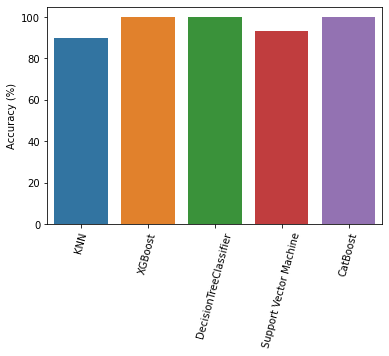

In [235]:
ax = sns.barplot(data = result_accuracy, x = result_accuracy.index, y = result_accuracy['Accuracy (%)'], )
ax.set_xticklabels(result_accuracy.index,rotation = 75)
plt.show()